The learning outcomes of this session are

-   to have an introductory understanding of solving linear equations in
    NumPy and be introduced to ill-conditioned matrices. To have
    experience of using the NumPy reference document pages.

-   To become familiar with projecting onto sub-spaces and null spaces.

-   Introduce the concept of power series solutions .

Set up
======

1.  Go to the moodle page and follow the link to the Lab 3 binder
    session.

2.  Be sure to import NumPy as before with

In [4]:
    import numpy as np
    import math

Adjacency matrices
==================

If you have not completed the adjacency matrix section in the previous
lab, go and do this first now.

Solving linear equations
========================

As discussed in topic 3 we can solve equations of the form
$$\mathbf{A} \underline{x} \;\; = \;\; \underline{b} \;\; ,
\label{eqn:linearEqn}$$ where we know $\mathbf{A}$ and $\underline{b}$
but not $\underline{x}$. In NumPy this can be computed using the
function numpy.linalg.solve.

Solving
-------

1.  Go to the NumPy reference pages
    <a href="https://docs.scipy.org/doc/numpy/reference/" class="uri">https://docs.scipy.org/doc/numpy/reference/</a>
    and find the page on numpy.linalg.solve and determine how to use it
    to solve the above.

2.  **Use numpy.linalg.solve to solve
    $\mathbf{A} \underline{x} = \underline{b}$ for the following.**
    $$\begin{aligned}
    \mathbf{A} = 
    \begin{pmatrix}
    10 & 1 \\
    1 & 10 
    \end{pmatrix}
    && \underline{b} = 
    \begin{pmatrix}
    200 \\
    -200
    \end{pmatrix} \\
    \mathbf{A} = 
    \begin{pmatrix}
    10 & 1 & 2\\
    1 & 10 & -3 \\
    3 & 15 & -3 
    \end{pmatrix}
    && \underline{b} = 
    \begin{pmatrix}
    200 \\
    -200 \\
    -150
    \end{pmatrix} \\
    \mathbf{A} = 
    \begin{pmatrix}
    10 & 1 & 2\\
    1 & 10 & -3 
    \end{pmatrix}
    && \underline{b} = 
    \begin{pmatrix}
    200 \\
    -200 \\
    -150
    \end{pmatrix} \\
    \mathbf{A} = 
    \begin{pmatrix}
    1 & 1 \\
    2 & 2
    \end{pmatrix}
    && \underline{b} = 
    \begin{pmatrix}
    200 \\
    -200
    \end{pmatrix} \end{aligned}$$

3.  Be sure to declare $\mathbf{A}$ and $\underline{b}$ as being of type
    float.

4.  **Some of these cases will generate error messages. What type of
    error message did they generate? Why?** Ask Hugh if you’re not sure
    (but stop and think about it first).

5.  **For those cases where there is a solution, how would you
    numerically show that it’s the right solution?**

Nearly singular matrices
------------------------

We’ve note previously that many matrices are singular -
i.e. non-invertible. There are also many matrices which are nearly
singular. The upshot of this is that solutions to
<a href="#eqn:linearEqn" data-reference-type="ref" data-reference="eqn:linearEqn">[eqn:linearEqn]</a>
are very unstable. This can even turn up in simple $2 \times 2$
matrices.

1.  Consider the following very similar matrices $$\mathbf{A} = 
    \begin{pmatrix}
    400 & -201\\
    -800&401.0 
    \end{pmatrix}
    \;\; 
    \mathbf{B} = 
    \begin{pmatrix}
    401 & -201\\
    -800&401.0 
    \end{pmatrix}$$

2.  For $$\underline{b} \;\; = \;\; 
    \begin{pmatrix}
    200 \\
    -200
    \end{pmatrix}$$ **Find solutions for $$\begin{aligned}
    \mathbf{A} \underline{x} \;\; &=& \underline{b} \;\; ,\\
    \mathbf{B} \underline{y} \;\; &=& \underline{b} \;\; .\end{aligned}$$**

1.  **Did you expect there to be such a large difference between
    $\underline{x}$ and $\underline{y}$?**

2.  Construct a matrix $\mathbf{C}$ defined as
    $$\mathbf{C} \;\; = \;\; d \mathbf{A} \,\, + \,\, (1-d) \mathbf{B} \;\; ,$$
    for various values of $d$ between $0$ and $1$. **For the same value
    of $\underline{b}$ find solutions for
    $\mathbf{C} \underline{x} = \underline{b}$. What is going on?**

Projection
==========

As discussed in Topic 3 we can project a vector in a particular space
onto a sub-space (e.g. project a vector in 2 dimensions onto a line,
project a vector in 3 dimensions onto a plane and so on).

To do this we need a orthonormal basis for the sub-space.

We then construct a matrix $\mathbf{P}$ whose rows are made up of the
unit vectors of the orthonormal basis. If the vector we want to project
is $\underline{x}$ then
$\mathbf{P}^{\intercal} (\mathbf{P} \underline{x})$ is the projected
vector.

2 Dimensions
------------

We’ll first consider a 2 dimensional example with the following line.

<figure>
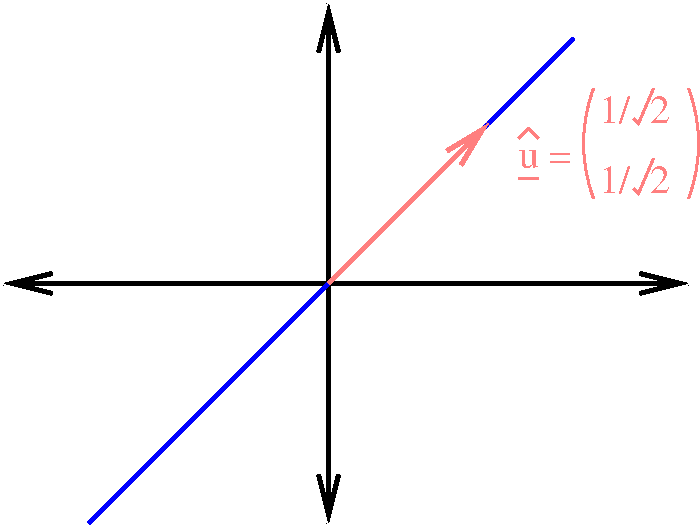<figcaption>image</figcaption>
</figure>

1.  In your script window type

In [ ]:
    uhat = np.array([1.0/math.sqrt(2),1.0/math.sqrt(2)])

In [ ]:
    P = np.array([uhat])

    (It's important make sure you have the square bracket ordering correct.)

In [ ]:
    Pt = np.transpose(P)

In [ ]:
    M = Pt.dot(P)

In [ ]:
    print(M)

    **What are the dimensions of $\mathbf{M}$?**

1.  One can now use $\mathbf{M}$ to project a vector onto this line.
    **Compute $\mathbf{M} \underline{x}$ for the following vectors.**
    $$\begin{pmatrix}
    1\\ 0 
    \end{pmatrix},
    \begin{pmatrix}
    1\\ 1 
    \end{pmatrix},
    \begin{pmatrix}
    0 \\ -1 
    \end{pmatrix},
    \begin{pmatrix}
    1\\ -1 
    \end{pmatrix}$$ **What did you find? Did they match with what you
    expected?**

1.  We could have picked a different unit vector to represent the same
    line, namely
    $\underline{\hat{u}} = \begin{pmatrix}-1/\sqrt 2 \\ -1 / \sqrt 2\end{pmatrix}$.
    **Compute $\mathbf{M}$ with this vector and then recompute
    $\mathbf{M} \underline{x}$ for the above vectors. What happenend?**

3 Dimensions
------------

This can be extended to three dimensions. In this case we will consider
the projection from 3 dimensions to the x-y plane and we shall pick as
an orthonormal basis $$\underline{\hat{u}} =
\begin{pmatrix}
1 \\
0 \\
0 
\end{pmatrix} \;\; 
\underline{\hat{v}} =
\begin{pmatrix}
0 \\
1 \\
0 
\end{pmatrix}$$

1.  **In Numpy construct the corresponding matrix $\mathbf{P}$ using
    $\underline{\hat{u}}$ and $\underline{\hat{v}}$ and hence compute
    $\mathbf{M} = \mathbf{P}^{\intercal}\mathbf{P}$.**

2.  **Compute $\mathbf{M} \underline{x}$ for** $$\begin{pmatrix}
    1 \\ 1 \\ 1
    \end{pmatrix}, \;\; 
    \begin{pmatrix}
    1 \\ 0 \\ 0
    \end{pmatrix}, \;\; 
    \begin{pmatrix}
    0 \\ 0 \\ 1
    \end{pmatrix} \;\;$$ **do the results match what you expected?**

1.  **Repeat above for different basis vectors to represent the same
    sub-space,** e.g. $$\underline{\hat{u}} =
    \begin{pmatrix}
    1/\sqrt 2 \\
    1 / \sqrt 2\\
    0 
    \end{pmatrix} \;\; 
    \underline{\hat{v}} =
    \begin{pmatrix}
    1 / \sqrt 2 \\
    -1 / \sqrt 2\\
    0 
    \end{pmatrix}$$

Power series
============

In the adjacency matrix problem, you learnt how to compute
$\mathbf{A}^2$, $\mathbf{A}^3$, $\mathbf{A}^4$ and so on where
$\mathbf{A}$ is an adjacency matrix.

In the last part of topic 3 we will be introduced to the *PageRank*
algorithm, which ranks the importance of nodes depending on how many
other nodes link into it. To solve this, we make use of the trick of
repeatedly multiplying a vector $\underline{x}$ by a matrix and updating
$\underline{x}$ with this new vector, until $\underline{x}$ no longer
changes. The key matrix for this is $\mathbf{R}^{\intercal}$ where
$$R_{ij} \;\; = \;\; \frac{A_{ij}}{\sum_j A_{ij}} \;\; .$$

Note that we are calculating $\mathbf{R}$ in this equation but that we
need to use $\mathbf{R}^{\intercal}$.

The algorithm is

$\underline{y} \gets \mathbf{R}^{\intercal} \underline{x}$
$\delta \gets | \,\,\underline{x} - \underline{y} \,\,|$
$\underline{x} \gets \underline{y}$ Return $\underline{x}$

1.  **Write a Python function to compute $\mathbf{R}^{\intercal}$ for a
    given adjacency matrix.**

1.  **Using your code compute $\mathbf{R}^{\intercal}$ for the following
    adjacency matrix.** $$\begin{pmatrix}
    0 & 1 & 0 & 0 & 0 \\
    1 & 0 & 1 & 0 & 0 \\
    1 & 0 & 0 & 1 & 1 \\
    1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 1
    \end{pmatrix}$$

1.  **Write a Python function to run the computeRank algorithm.** Print
    out $\underline{x}$ after every update. Use a number of different
    possible initial values of $\underline{x}$, in particular where
    there is a 1 in one entry and zero elsewhere and where all the
    values are equal to $1/5$.